In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

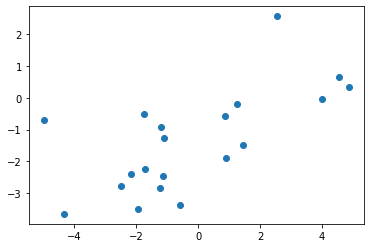

In [2]:
N = 20
# random data on the x-axis in (-5, +5)
X = np.random.random(N)*10 - 5

# a line plus some noise
Y = 0.5 * X - 1 + np.random.randn(N)

plt.scatter(X, Y);

In [3]:
# linear regression
model = nn.Linear(1, 1)

In [4]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [5]:
X.shape

(20,)

In [6]:
Y.shape

(20,)

In [7]:
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [8]:
print(X.shape)
print(Y.shape)

(20, 1)
(20, 1)


In [9]:
type(inputs)

torch.Tensor

In [10]:
n_epochs = 30
losses = []
for it in range(n_epochs):
    # zero the parameter gradients to prevent them from accumulating
    optimizer.zero_grad()
    
    # forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # use item to bring back single number from pytorch to python
    losses.append(loss.item())
    
    loss.backward()
    
    # to do one step of gd
    optimizer.step()
    
    print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/30, Loss: 4.2015
Epoch 2/30, Loss: 3.1762
Epoch 3/30, Loss: 2.5330
Epoch 4/30, Loss: 2.1226
Epoch 5/30, Loss: 1.8594
Epoch 6/30, Loss: 1.6904
Epoch 7/30, Loss: 1.5819
Epoch 8/30, Loss: 1.5121
Epoch 9/30, Loss: 1.4673
Epoch 10/30, Loss: 1.4386
Epoch 11/30, Loss: 1.4201
Epoch 12/30, Loss: 1.4082
Epoch 13/30, Loss: 1.4006
Epoch 14/30, Loss: 1.3957
Epoch 15/30, Loss: 1.3925
Epoch 16/30, Loss: 1.3905
Epoch 17/30, Loss: 1.3892
Epoch 18/30, Loss: 1.3883
Epoch 19/30, Loss: 1.3878
Epoch 20/30, Loss: 1.3875
Epoch 21/30, Loss: 1.3872
Epoch 22/30, Loss: 1.3871
Epoch 23/30, Loss: 1.3870
Epoch 24/30, Loss: 1.3870
Epoch 25/30, Loss: 1.3869
Epoch 26/30, Loss: 1.3869
Epoch 27/30, Loss: 1.3869
Epoch 28/30, Loss: 1.3869
Epoch 29/30, Loss: 1.3869
Epoch 30/30, Loss: 1.3869


C:\Users\Samin\Anaconda3\envs\Kaggle-Competitions\lib\site-packages\torch\autograd\__init__.py:149: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:115.)
  allow_unreachable=True, accumulate_grad=True)  # allow_unreachable flag


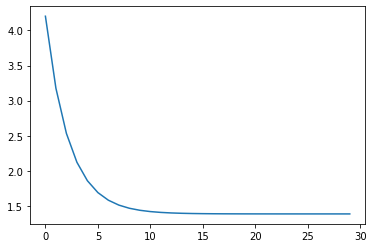

In [11]:
plt.plot(losses);

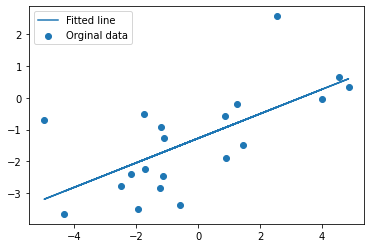

In [13]:
predicted = model(inputs).detach().numpy()
plt.scatter(X, Y, label='Orginal data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()

In [14]:
model(inputs).numpy()

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

In [15]:
with torch.no_grad():
    out = model(inputs).numpy()
out

array([[-1.9400852 ],
       [-0.9261651 ],
       [-0.93839943],
       [-0.29351985],
       [-2.9396207 ],
       [-0.7889812 ],
       [-1.950851  ],
       [-2.0278292 ],
       [-1.7543029 ],
       [ 0.5917475 ],
       [ 0.47364175],
       [-1.7095796 ],
       [-0.7220119 ],
       [-1.7036304 ],
       [-2.1148372 ],
       [-3.1880827 ],
       [-1.5003095 ],
       [ 0.26672077],
       [-2.2340136 ],
       [-1.7417347 ]], dtype=float32)

In [16]:
# synthetic data is useful because we know the answer
# True values of (w, b) are (0.5, -1)

# w:2D array
w = model.weight.data.numpy()
# b:1D array
b = model.bias.data.numpy()
print(w, b)

[[0.3845907]] [-1.27377]
